<a href="https://colab.research.google.com/github/Prajwal-Pardhi/MultiRoute-Optimizer-for-Multi-Vehicle-Delivery-System/blob/main/MultiRoute_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MultiRoute Optimizer for Multi-Vehicle Delivery System**
This project implements a Genetic Algorithm to solve the Vehicle Routing Problem (VRP) for multiple vehicles. The algorithm optimizes the delivery routes from a central depot to multiple locations, minimizing the total travel distance and balancing the workload among the vehicles. The solution involves encoding possible routes as individuals in a population, which are then evolved through selection, crossover, and mutation to find the optimal or near-optimal delivery routes.

In [1]:
!pip install matplotlib deap

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

In [5]:
# Setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

In [6]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [7]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [8]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [9]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

gen	nevals	avg    	min    
0  	300   	715.603	5.10155
1  	213   	684.341	5.12711
2  	243   	676.854	4.36657
3  	232   	669.304	6.01262
4  	233   	666.243	4.7566 
5  	218   	652.018	4.7566 
6  	213   	647.519	2.18689
7  	233   	648.35 	1.45572
8  	219   	638.017	2.69931
9  	209   	617.532	2.8331 
10 	224   	612.039	4.06569
11 	230   	612.602	2.86206
12 	230   	597.608	1.14277
13 	217   	564.247	6.68466
14 	231   	536.408	3.54686
15 	250   	526.093	3.54686
16 	238   	505.697	6.3269 
17 	236   	492.048	4.23417
18 	225   	482.586	4.23417
19 	225   	469.945	1.41074
20 	209   	459.941	3.08688
21 	232   	444.05 	3.95432
22 	237   	436.365	4.45425
23 	217   	430.895	3.97047
24 	227   	422.703	3.76481
25 	246   	419.383	2.54232
26 	233   	407.367	2.54232
27 	219   	401.559	3.58049
28 	229   	394.494	4.50443
29 	223   	384.994	4.35198
30 	238   	383.119	4.40421
31 	225   	374.164	2.01128
32 	221   	372.446	2.00611
33 	243   	362.354	3.46612
34 	232   	358.979	4.37089
35 	244   	356.789	5.7587 
3

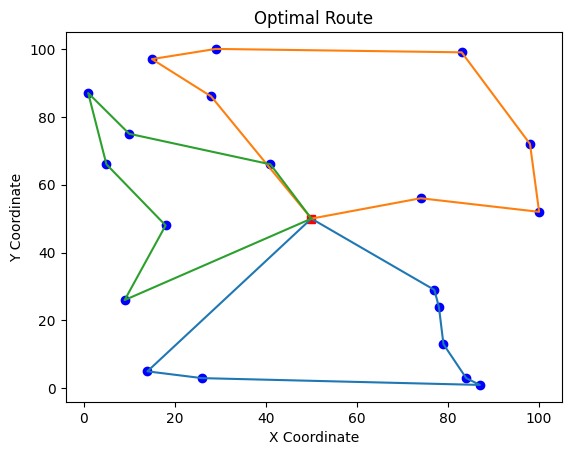

In [10]:
if __name__ == "__main__":
    main()